In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ft2font

np.random.seed(0)

In [3]:
# Load tips dataset
tips = sns.load_dataset("tips")
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

### Nature figure protocols

- Sans-serif typeface
- Font size no smaller than 7 point
- No excessive boxing
- Vertical axis of histograms should not be truncated to exaggerate small differences
- Thinnest lines in the final figure should be no smaller than 0.5 point wide
- Figures divided into parts should be labeled with a lower-case, bold a, b, and so on
- Units should have a single space between the number and the unit, and follow SI nomenclature
- Thousands should be separated by commas (1,000)
- Scale bars should be used rather than magnification factors, with the length of the bar defined in the legend rather than on the bar itself

In [4]:
def make_pretty():
    sns.set(context='paper', style='white', rc={'legend.frameon':False, 'font.family':'sans-serif', \
                                                'font.sans-serif':'Helvetica', 'figure.edgecolor':'white', \
                                                'figure.figsize':(6,3), 'axes.edgecolor':'grey',\
                                                'axes.linewidth':0.5})

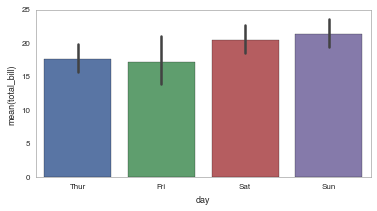

In [5]:
make_pretty()

# Create one figure which can have subplots
fig, ax = plt.subplots()
ax = sns.barplot(x="day", y="total_bill", data=tips, palette=None)

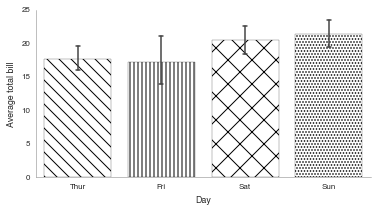

In [6]:
kwargs = {'fill':False}
ax = sns.barplot(x="day", y="total_bill", data=tips, errwidth=1.5, capsize=0.05, **kwargs)
ax.set_xlabel('Day')
ax.set_ylabel('Average total bill')

hatches = [2*'\\',3*'|', 'x', 4*'.']
for bar,hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)
ax = sns.despine(top=True, right=True)

Now, instead of grouping the sexes together while calculating avergaes, we'll plot them separately to see if there's any trend.

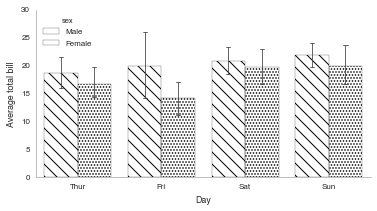

In [7]:
fig.clear()
kwargs = {'fill':False}
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips,\
                    errwidth=0.8, capsize=0.05, **kwargs);
ax.set_xlabel('Day')
ax.set_ylabel('Average total bill')

hatches = 4*[2*'\\'] + 4*[4*'.']
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)
ax = sns.despine(top=True, right=True)



You might have noticed that the legend doesn't have the hatch pattern. We will have to create a custom legend.

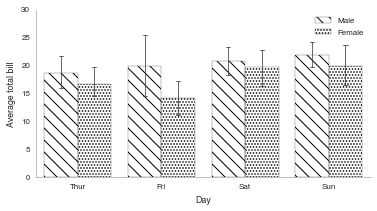

In [8]:
# This is the same plotting code as above
# See below for new code
kwargs = {'fill':False}
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips,\
                    errwidth=0.8, capsize=0.05, **kwargs);
ax.set_xlabel('Day')
ax.set_ylabel('Average total bill')

hatches = 4*[2*'\\'] + 4*[4*'.']
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)
ax = sns.despine(top=True, right=True)

# We'll create our own custom legend now
# To do that, we need to import mpatches from matplotlib library
import matplotlib.patches as mpatches

legend_hatches = [2*'\\', 4*'.']
legend_labels  = ['Male', 'Female']

# Create the legend patches
legend_patches = [mpatches.Patch(fill=None, hatch=H, label=L) for H, L in zip(legend_hatches, legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches)